## 1. Importer les Bibliothèques & Charger les Données <a id='1'></a>

On commence par importer les bibliothèques et charger nos données transformées.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

#Pour mieux voir les résultats
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)
pd.set_option('display.float_format', '{:.2f}'.format)

#Style des graphiques
sns.set_style('whitegrid')
sns.set_palette('husl')
plt.rcParams['figure.figsize'] = (14, 7)
plt.rcParams['font.size'] = 11


In [3]:
#Charger les données transformées
df = pd.read_csv('../data/Crime_Data_Transformed.csv')

# Convertir les colonnes de dates
df['Date Rptd'] = pd.to_datetime(df['Date Rptd'])
df['DATE OCC'] = pd.to_datetime(df['DATE OCC'])

print(f"✓ Données chargées avec succès !")
print(f"  Taille : {df.shape}")
print(f"  Période : {df['DATE OCC'].min()} à {df['DATE OCC'].max()}")

✓ Données chargées avec succès !
  Taille : (50000, 51)
  Période : 2020-01-01 00:00:00 à 2025-01-30 00:00:00


In [4]:
# Voir les premières lignes
df.head(10)

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Part 1-2,Crm Cd,Crm Cd Desc,Mocodes,Vict Age,Vict Sex,Vict Descent,Premis Cd,Premis Desc,Weapon Used Cd,Weapon Desc,Status,Status Desc,Crm Cd 1,Crm Cd 2,Crm Cd 3,Crm Cd 4,LOCATION,Cross Street,LAT,LON,year,month,month_name,day_of_week,day_name,quarter,hour,time_period,is_weekend,reporting_delay_days,crime_severity,crime_category,weapon_involved,weapon_category,victim_age_group,location_type,area_crime_frequency,area_risk_score,population,median_income,area_size_sq_miles,total_cases,crimes_per_1000
0,200216570,2020-10-23,2020-10-01,2000,2,Rampart,249,2,956,"LETTERS, LEWD - TELEPHONE CALLS, LEWD",1906 1820 0913,42,F,W,502.00,"MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)",NaN,NaN,AA,Adult Arrest,956.00,NaN,NaN,NaN,600 ST PAUL AV,NaN,34.05,-118.26,2020,10,October,3,Thursday,4,20,Evening (18:00-23:59),0,22,Part 2 - Less Serious Crime,Other,0,No Weapon,Middle Age (35-49),Residential,2363,68.41,61000,38000,6.80,2363,38.74
1,211009787,2021-07-04,2021-07-03,2250,10,West Valley,1011,2,354,THEFT OF IDENTITY,1822 0377,49,M,W,101.00,STREET,NaN,NaN,AA,Adult Arrest,354.00,NaN,NaN,NaN,ARMINTA,WOODLEY,34.20,-118.55,2021,7,July,5,Saturday,3,22,Evening (18:00-23:59),1,1,Part 2 - Less Serious Crime,Property Crime,0,No Weapon,Middle Age (35-49),Public Street,2124,61.49,70000,62000,10.10,2124,30.34
2,201225286,2020-11-26,2020-11-26,1610,12,77th Street,1241,1,230,"ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT",1822 2021 0340 0334 0353 0445,35,M,B,108.00,PARKING LOT,102.00,HAND GUN,IC,Invest Cont,230.00,NaN,NaN,NaN,6400 WEST BL,NaN,33.98,-118.34,2020,11,November,3,Thursday,4,16,Afternoon (12:00-17:59),0,0,Part 1 - Serious Crime,Violent Crime,1,Firearm,Middle Age (35-49),Parking Area,3059,88.56,51000,32000,8.30,3059,59.98
3,231614576,2023-12-01,2023-10-04,900,16,Foothill,1657,1,440,THEFT PLAIN - PETTY ($950 & UNDER),0344,50,F,H,116.00,OTHER/OUTSIDE,NaN,NaN,IC,Invest Cont,440.00,NaN,NaN,NaN,10100 HILLHAVEN AV,NaN,34.25,-118.29,2023,10,October,2,Wednesday,4,9,Morning (06:00-11:59),0,58,Part 1 - Serious Crime,Property Crime,0,No Weapon,Senior (50-64),Other,1636,47.37,60000,58000,9.50,1636,27.27
4,221007431,2022-04-01,2022-03-31,1830,10,West Valley,1004,1,420,THEFT FROM MOTOR VEHICLE - PETTY ($950 & UNDER),1822 0344,40,M,F,701.00,HOSPITAL,NaN,NaN,IC,Invest Cont,420.00,NaN,NaN,NaN,18300 ROSCOE BL,NaN,34.22,-118.53,2022,3,March,3,Thursday,1,18,Evening (18:00-23:59),0,1,Part 1 - Serious Crime,Property Crime,0,No Weapon,Middle Age (35-49),Other,2124,61.49,70000,62000,10.10,2124,30.34
5,240207085,2024-02-29,2024-02-29,2100,2,Rampart,275,2,626,INTIMATE PARTNER - SIMPLE ASSAULT,2000 0913 1814 0444 0429,26,F,H,502.00,"MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)",400.00,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",IC,Invest Cont,626.00,NaN,NaN,NaN,1600 W 11TH ST,NaN,34.05,-118.28,2024,2,February,3,Thursday,1,21,Evening (18:00-23:59),0,0,Part 2 - Less Serious Crime,Violent Crime,1,Physical Force,Adult (25-34),Residential,2363,68.41,61000,38000,6.80,2363,38.74
6,210513939,2021-09-21,2021-09-21,1338,5,Harbor,521,2,930,CRIMINAL THREATS - NO WEAPON DISPLAYED,1912 1258 1822,10,M,H,704.00,ELEMENTARY SCHOOL,500.00,UNKNOWN WEAPON/OTHER WEAPON,IC,Invest Cont,930.00,NaN,NaN,NaN,1800 N TAPER AV,NaN,33.76,-118.30,2021,9,September,1,Tuesday,3,13,Afternoon (12:00-17:59),0,0,Part 2 - Less Serious Crime,Other,1,Other Weapon,Child (0-12),Educational,1950,56.46,46000,52000,8.50,1950,42.39
7,210213404,2021-08-18,2021-08-18,1400,2,Rampart,233,2,626,INTIMATE PARTNER - SIMPLE ASSAULT,0913 2000 1814 0444,20,M,H,502.00,"MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)",400.00,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",IC,Invest Cont,626.00,NaN,NaN,NaN,2700 BEVERLY BL,NaN,34.07,-118.28,2021,8,August,2,Wednesday,3,14,Afternoon (12:00-17:59),0,0,Part 2 - Less Serious Crime,Violent Crime,1,Physical Force,Young Adult (18-24),Residential,2363,68.41,61000,38000,6.80,2363,38.74
8,231013989,2023-08-14,2023-08-08,1400,10,West Val

In [5]:
#Infos sur le dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 51 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   DR_NO                 50000 non-null  int64         
 1   Date Rptd             50000 non-null  datetime64[ns]
 2   DATE OCC              50000 non-null  datetime64[ns]
 3   TIME OCC              50000 non-null  int64         
 4   AREA                  50000 non-null  int64         
 5   AREA NAME             50000 non-null  object        
 6   Rpt Dist No           50000 non-null  int64         
 7   Part 1-2              50000 non-null  int64         
 8   Crm Cd                50000 non-null  int64         
 9   Crm Cd Desc           50000 non-null  object        
 10  Mocodes               42505 non-null  object        
 11  Vict Age              50000 non-null  int64         
 12  Vict Sex              42865 non-null  object        
 13  Vict Descent    

## 2. Statistiques Descriptives <a id='2'></a>

On va explorer les statistiques de base pour comprendre nos données.

In [6]:
#Statistiques pour les colonnes numériques
print("=" * 80)
print("STATISTIQUES - VARIABLES NUMÉRIQUES")
print("=" * 80)
df.describe()

STATISTIQUES - VARIABLES NUMÉRIQUES


,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA,Rpt Dist No,Part 1-2,Crm Cd,Vict Age,Premis Cd,Weapon Used Cd,Crm Cd 1,Crm Cd 2,Crm Cd 3,Crm Cd 4,LAT,LON,year,month,day_of_week,quarter,hour,is_weekend,reporting_delay_days,weapon_involved,area_crime_frequency,area_risk_score,population,median_income,area_size_sq_miles,total_cases,crimes_per_1000
count,50000.00,50000,50000,50000.00,50000.00,50000.00,50000.00,50000.00,50000.00,50000.00,16245.00,49997.00,3412.00,113.00,2.00,50000.00,50000.00,50000.00,50000.00,50000.00,50000.00,50000.00,50000.00,50000.00,50000.00,50000.00,50000.00,50000.00,50000.00,50000.00,50000.00,50000.00
mean,220237878.04,2022-05-26 05:17:15.648000,2022-05-14 00:59:16.224000,1338.77,10.68,1114.84,1.40,501.56,28.82,306.89,365.16,501.28,961.60,984.25,909.50,34.00,-118.11,2021.88,6.35,3.02,2.45,13.21,0.29,12.18,0.32,2460.41,71.23,58814.94,54830.56,7.79,2460.41,42.93
min,2203.00,2020-01-01 00:00:00,2020-01-01 00:00:00,1.00,1.00,101.00,1.00,110.00,-2.00,101.00,101.00,110.00,210.00,761.00,821.00,0.00,-118.67,2020.00,1.00,0.00,1.00,0.00,0.00,0.00,0.00,1636.00,47.37,46000.00,30000.00,5.20,1636.00,27.27
25%,210613598.50,2021-04-19 00:00:00,2021-04-02 00:00:00,900.00,5.00,585.00,1.00,331.00,0.00,101.00,312.00,331.00,998.00,998.00,865.25,34.02,-118.43,2021.00,3.00,1.00,1.00,9.00,0.00,0.00,0.00,2117.00,61.29,52000.00,42000.00,6.40,2117.00,34.03
50%,220914820.00,2022-06-07 00:00:00,2022-05-25 00:00:00,1420.00,11.00,1137.00,1.00,442.00,30.00,203.00,400.00,442.00,998.00,998.00,909.50,34.06,-118.32,2022.00,6.00,3.00,2.00,14.00,0.00,1.00,0.00,2363.00,68.41,58000.00,50000.00,7.50,2363.00,39.07
75%,231114706.00,2023-07-06 00:00:00,2023-06-25 00:00:00,1900.00,16.00,1617.00,2.00,626.00,44.00,501.00,400.00,626.00,998.00,998.00,953.75,34.16,-118.27,2023.00,9.00,5.00,3.00,19.00,1.00,2.00,1.00,2992.00,86.62,65000.00,68000.00,8.80,2992.00,51.72
max,251704024.00,2025-02-06 00:00:00,2025-01-30 00:00:00,2359.00,21.00,2197.00,2.00,956.00,99.00,972.00,516.00,956.00,999.00,999.00,998.00,34.33,0.00,2025.00,12.00,6.00,4.00,23.00,1.00,1777.00,1.00,3454.00,100.00,78000.00,95000.00,12.50,3454.00,63.96
std,13284696.05,NaN,NaN,650.06,6.12,612.55,0.49,206.39,21.90,219.62,123.03,206.18,103.21,43.56,125.16,1.56,5.39,1.32,3.46,1.98,1.12,6.50,0.45,67.58,0.47,455.75,13.19,8733.15,18504.49,1.79,455.75,11.18


In [7]:
#Statistiques pour les colonnes catégorielles
print("=" * 80)
print("STATISTIQUES - VARIABLES CATÉGORIELLES")
print("=" * 80)
df.describe(include=['object'])

STATISTIQUES - VARIABLES CATÉGORIELLES


,AREA NAME,Crm Cd Desc,Mocodes,Vict Sex,Vict Descent,Premis Desc,Weapon Desc,Status,Status Desc,LOCATION,Cross Street,month_name,day_name,time_period,crime_severity,crime_category,weapon_category,victim_age_group,location_type
count,50000,50000,42505,42865,42864,49976,16245,50000,50000,50000,7528,50000,50000,50000,50000,50000,50000,50000,50000
unique,21,115,21958,4,19,262,69,5,5,22135,2430,12,7,4,2,5,5,8,7
top,Central,VEHICLE - STOLEN,0344,M,H,STREET,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",IC,Invest Cont,800 N ALAMEDA ST,BROADWAY,January,Friday,Afternoon (12:00-17:59),Part 1 - Serious Crime,Property Crime,No Weapon,Unknown,Public Street
freq,3454,5618,2155,19977,14831,12920,8706,39936,39936,121,124,4635,7592,16261,29863,28870,33755,13375,15283


### 2.1 Distribution des Catégories de Crimes

In [8]:
#Les 15 types de crimes les plus fréquents
print("\n" + "=" * 80)
print("TOP 15 DES TYPES DE CRIMES LES PLUS FRÉQUENTS")
print("=" * 80)
comptage_crimes = df['Crm Cd Desc'].value_counts().head(15)
print(comptage_crimes)
print(f"\nNombre total de types de crimes : {df['Crm Cd Desc'].nunique()}")


TOP 15 DES TYPES DE CRIMES LES PLUS FRÉQUENTS
Crm Cd Desc
VEHICLE - STOLEN                                            5618
BATTERY - SIMPLE ASSAULT                                    3681
BURGLARY FROM VEHICLE                                       3142
THEFT OF IDENTITY                                           3122
VANDALISM - FELONY ($400 & OVER, ALL CHURCH VANDALISMS)     3052
BURGLARY                                                    2946
THEFT PLAIN - PETTY ($950 & UNDER)                          2629
ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT              2583
INTIMATE PARTNER - SIMPLE ASSAULT                           2351
THEFT FROM MOTOR VEHICLE - PETTY ($950 & UNDER)             2045
THEFT FROM MOTOR VEHICLE - GRAND ($950.01 AND OVER)         1803
THEFT-GRAND ($950.01 & OVER)EXCPT,GUNS,FOWL,LIVESTK,PROD    1724
ROBBERY                                                     1605
SHOPLIFTING - PETTY THEFT ($950 & UNDER)                    1560
VANDALISM - MISDEAMEANOR ($399 

In [9]:
#Distribution par catégorie de crime
print("\n" + "=" * 80)
print("DISTRIBUTION PAR CATÉGORIE DE CRIME")
print("=" * 80)
comptage_categories = df['crime_category'].value_counts()
print(comptage_categories)
print(f"\nPourcentages :")
print(df['crime_category'].value_counts(normalize=True) * 100)


DISTRIBUTION PAR CATÉGORIE DE CRIME
crime_category
Property Crime     28870
Violent Crime      10376
Other               6277
Vandalism           4379
Vehicle-Related       98
Name: count, dtype: int64

Pourcentages :
crime_category
Property Crime    57.74
Violent Crime     20.75
Other             12.55
Vandalism          8.76
Vehicle-Related    0.20
Name: proportion, dtype: float64


### 2.2 Distribution Géographique

In [10]:
#Distribution par zone
print("\n" + "=" * 80)
print("DISTRIBUTION DES CRIMES PAR ZONE")
print("=" * 80)
comptage_zones = df['AREA NAME'].value_counts()
print(comptage_zones)
print(f"\nNombre total de zones : {df['AREA NAME'].nunique()}")


DISTRIBUTION DES CRIMES PAR ZONE
AREA NAME
Central        3454
77th Street    3059
Southwest      3000
Pacific        2992
Hollywood      2591
N Hollywood    2550
Olympic        2484
Southeast      2435
Wilshire       2414
Rampart        2363
Newton         2353
West LA        2258
Northeast      2149
West Valley    2124
Van Nuys       2117
Devonshire     2110
Topanga        2092
Mission        2024
Harbor         1950
Hollenbeck     1845
Foothill       1636
Name: count, dtype: int64

Nombre total de zones : 21


### 2.3 Démographie des Victimes

In [12]:
#Distribution des groupes d'âge de toutes les victimes
print("\n" + "=" * 80)
print("DISTRIBUTION DES GROUPES D'ÂGE DES VICTIMES")
print("=" * 80)
print(df.columns)
comptage_groupes_age = df['victim_age_group'].value_counts()
print(comptage_groupes_age)
print(f"\nPourcentages:")
print(df['victim_age_group'].value_counts(normalize=True) * 100)


DISTRIBUTION DES GROUPES D'ÂGE DES VICTIMES
Index(['DR_NO', 'Date Rptd', 'DATE OCC', 'TIME OCC', 'AREA', 'AREA NAME',
       'Rpt Dist No', 'Part 1-2', 'Crm Cd', 'Crm Cd Desc', 'Mocodes',
       'Vict Age', 'Vict Sex', 'Vict Descent', 'Premis Cd', 'Premis Desc',
       'Weapon Used Cd', 'Weapon Desc', 'Status', 'Status Desc', 'Crm Cd 1',
       'Crm Cd 2', 'Crm Cd 3', 'Crm Cd 4', 'LOCATION', 'Cross Street', 'LAT',
       'LON', 'year', 'month', 'month_name', 'day_of_week', 'day_name',
       'quarter', 'hour', 'time_period', 'is_weekend', 'reporting_delay_days',
       'crime_severity', 'crime_category', 'weapon_involved',
       'weapon_category', 'victim_age_group', 'location_type',
       'area_crime_frequency', 'area_risk_score', 'population',
       'median_income', 'area_size_sq_miles', 'total_cases',
       'crimes_per_1000'],
      dtype='object')
victim_age_group
Unknown                13375
Middle Age (35-49)     11065
Adult (25-34)          10034
Senior (50-64)          663

In [23]:
#Distribution du sexe des victimes
print("\n" + "=" * 80)
print("DISTRIBUTION DU SEXE DES VICTIMES")
print("=" * 80)
comptage_sexe = df['Vict Sex'].value_counts()
print(comptage_sexe)


DISTRIBUTION DU SEXE DES VICTIMES
Vict Sex
M    19977
F    17961
X     4922
H        5
Name: count, dtype: int64


### 2.4 Patterns Temporels

In [ ]:
#Distribution par période de temps
print("\n" + "=" * 80)
print("CRIMES PAR PÉRIODE DE TEMPS")
print("=" * 80)
print(df.columns)
comptage_periodes = df['time_period'].value_counts().sort_index()
print(comptage_periodes)


CRIMES PAR PÉRIODE DE TEMPS
Index(['DR_NO', 'Date Rptd', 'DATE OCC', 'TIME OCC', 'AREA', 'AREA NAME',
       'Rpt Dist No', 'Part 1-2', 'Crm Cd', 'Crm Cd Desc', 'Mocodes',
       'Vict Age', 'Vict Sex', 'Vict Descent', 'Premis Cd', 'Premis Desc',
       'Weapon Used Cd', 'Weapon Desc', 'Status', 'Status Desc', 'Crm Cd 1',
       'Crm Cd 2', 'Crm Cd 3', 'Crm Cd 4', 'LOCATION', 'Cross Street', 'LAT',
       'LON', 'year', 'month', 'month_name', 'day_of_week', 'day_name',
       'quarter', 'hour', 'time_period', 'is_weekend', 'reporting_delay_days',
       'crime_severity', 'crime_category', 'weapon_involved',
       'weapon_category', 'victim_age_group', 'location_type',
       'area_crime_frequency', 'area_risk_score', 'population',
       'median_income', 'area_size_sq_miles', 'total_cases',
       'crimes_per_1000'],
      dtype='object')
time_period
Afternoon (12:00-17:59)     16261
Evening (18:00-23:59)       15557
Late Night (00:00-05:59)     7635
Morning (06:00-11:59)       10547

In [29]:
#Semaine vs Weekend
print("\n" + "=" * 80)
print("CRIMES EN SEMAINE VS WEEKEND")
print("=" * 80)
print(df.columns)
comptage_weekend = df['is_weekend'].value_counts()
comptage_weekend.index = ['Semaine', 'Weekend']
print(comptage_weekend)
print(f"\nPourcentages:")
print((comptage_weekend / comptage_weekend.sum()) * 100)


CRIMES EN SEMAINE VS WEEKEND
Index(['DR_NO', 'Date Rptd', 'DATE OCC', 'TIME OCC', 'AREA', 'AREA NAME',
       'Rpt Dist No', 'Part 1-2', 'Crm Cd', 'Crm Cd Desc', 'Mocodes',
       'Vict Age', 'Vict Sex', 'Vict Descent', 'Premis Cd', 'Premis Desc',
       'Weapon Used Cd', 'Weapon Desc', 'Status', 'Status Desc', 'Crm Cd 1',
       'Crm Cd 2', 'Crm Cd 3', 'Crm Cd 4', 'LOCATION', 'Cross Street', 'LAT',
       'LON', 'year', 'month', 'month_name', 'day_of_week', 'day_name',
       'quarter', 'hour', 'time_period', 'is_weekend', 'reporting_delay_days',
       'crime_severity', 'crime_category', 'weapon_involved',
       'weapon_category', 'victim_age_group', 'location_type',
       'area_crime_frequency', 'area_risk_score', 'population',
       'median_income', 'area_size_sq_miles', 'total_cases',
       'crimes_per_1000'],
      dtype='object')
Semaine    35680
Weekend    14320
Name: count, dtype: int64

Pourcentages:
Semaine   71.36
Weekend   28.64
Name: count, dtype: float64


### 2.5 Utilisation d'Armes

In [32]:
#Implication d'armes
print("\n" + "=" * 80)
print("IMPLICATION D'ARMES DANS LES CRIMES")
print("=" * 80)
print(df.columns)
comptage_armes = df['weapon_involved'].value_counts()
print(comptage_armes)
print(f"\nPourcentages:")
print((comptage_armes / comptage_armes.sum()) * 100)


IMPLICATION D'ARMES DANS LES CRIMES
Index(['DR_NO', 'Date Rptd', 'DATE OCC', 'TIME OCC', 'AREA', 'AREA NAME',
       'Rpt Dist No', 'Part 1-2', 'Crm Cd', 'Crm Cd Desc', 'Mocodes',
       'Vict Age', 'Vict Sex', 'Vict Descent', 'Premis Cd', 'Premis Desc',
       'Weapon Used Cd', 'Weapon Desc', 'Status', 'Status Desc', 'Crm Cd 1',
       'Crm Cd 2', 'Crm Cd 3', 'Crm Cd 4', 'LOCATION', 'Cross Street', 'LAT',
       'LON', 'year', 'month', 'month_name', 'day_of_week', 'day_name',
       'quarter', 'hour', 'time_period', 'is_weekend', 'reporting_delay_days',
       'crime_severity', 'crime_category', 'weapon_involved',
       'weapon_category', 'victim_age_group', 'location_type',
       'area_crime_frequency', 'area_risk_score', 'population',
       'median_income', 'area_size_sq_miles', 'total_cases',
       'crimes_per_1000'],
      dtype='object')
weapon_involved
0    33755
1    16245
Name: count, dtype: int64

Pourcentages:
weapon_involved
0   67.51
1   32.49
Name: count, dtype: floa

In [ ]:
#Distribution des catégories d'armes
print("\n" + "=" * 80)
print("DISTRIBUTION DES CATÉGORIES D'ARMES")
print("=" * 80)
print(df.columns)
comptage_categories_armes = df['weapon_category'].value_counts()
print(comptage_categories_armes)


DISTRIBUTION DES CATÉGORIES D'ARMES
Index(['DR_NO', 'Date Rptd', 'DATE OCC', 'TIME OCC', 'AREA', 'AREA NAME',
       'Rpt Dist No', 'Part 1-2', 'Crm Cd', 'Crm Cd Desc', 'Mocodes',
       'Vict Age', 'Vict Sex', 'Vict Descent', 'Premis Cd', 'Premis Desc',
       'Weapon Used Cd', 'Weapon Desc', 'Status', 'Status Desc', 'Crm Cd 1',
       'Crm Cd 2', 'Crm Cd 3', 'Crm Cd 4', 'LOCATION', 'Cross Street', 'LAT',
       'LON', 'year', 'month', 'month_name', 'day_of_week', 'day_name',
       'quarter', 'hour', 'time_period', 'is_weekend', 'reporting_delay_days',
       'crime_severity', 'crime_category', 'weapon_involved',
       'weapon_category', 'victim_age_group', 'location_type',
       'area_crime_frequency', 'area_risk_score', 'population',
       'median_income', 'area_size_sq_miles', 'total_cases',
       'crimes_per_1000'],
      dtype='object')
weapon_category
No Weapon         33755
Physical Force     8706
Other Weapon       4646
Firearm            1951
Blade/Knife         942
Nam

## 3. Agrégations et Opérations de Groupe <a id='3'></a>

Utilisons groupby, tableaux pivot et crosstabs pour analyser les patterns et relations.

### 3.1 Sévérité des Crimes par Zone

In [37]:
#Grouper par zone et sévérité du crime
print("=" * 80)
print("SÉVÉRITÉ DES CRIMES PAR ZONE")
print("=" * 80)
print(df.columns)
severite_par_zone = df.groupby(['AREA NAME', 'crime_severity']).size().unstack(fill_value=0)
severite_par_zone['Total'] = severite_par_zone.sum(axis=1)
severite_par_zone = severite_par_zone.sort_values('Total', ascending=False)
print(severite_par_zone)

SÉVÉRITÉ DES CRIMES PAR ZONE
Index(['DR_NO', 'Date Rptd', 'DATE OCC', 'TIME OCC', 'AREA', 'AREA NAME',
       'Rpt Dist No', 'Part 1-2', 'Crm Cd', 'Crm Cd Desc', 'Mocodes',
       'Vict Age', 'Vict Sex', 'Vict Descent', 'Premis Cd', 'Premis Desc',
       'Weapon Used Cd', 'Weapon Desc', 'Status', 'Status Desc', 'Crm Cd 1',
       'Crm Cd 2', 'Crm Cd 3', 'Crm Cd 4', 'LOCATION', 'Cross Street', 'LAT',
       'LON', 'year', 'month', 'month_name', 'day_of_week', 'day_name',
       'quarter', 'hour', 'time_period', 'is_weekend', 'reporting_delay_days',
       'crime_severity', 'crime_category', 'weapon_involved',
       'weapon_category', 'victim_age_group', 'location_type',
       'area_crime_frequency', 'area_risk_score', 'population',
       'median_income', 'area_size_sq_miles', 'total_cases',
       'crimes_per_1000'],
      dtype='object')
crime_severity  Part 1 - Serious Crime  Part 2 - Less Serious Crime  Total
AREA NAME                                                               

### 3.2 Catégorie de Crime par Période de Temps

In [40]:
#Crosstab: Catégorie crime vs Période temps
print("\n" + "=" * 80)
print("CATÉGORIE DE CRIME PAR PÉRIODE")
print("=" * 80)
print(df.columns)
crime_temps = pd.crosstab(df['crime_category'], df['time_period'], margins=True)
print(crime_temps)


CATÉGORIE DE CRIME PAR PÉRIODE
Index(['DR_NO', 'Date Rptd', 'DATE OCC', 'TIME OCC', 'AREA', 'AREA NAME',
       'Rpt Dist No', 'Part 1-2', 'Crm Cd', 'Crm Cd Desc', 'Mocodes',
       'Vict Age', 'Vict Sex', 'Vict Descent', 'Premis Cd', 'Premis Desc',
       'Weapon Used Cd', 'Weapon Desc', 'Status', 'Status Desc', 'Crm Cd 1',
       'Crm Cd 2', 'Crm Cd 3', 'Crm Cd 4', 'LOCATION', 'Cross Street', 'LAT',
       'LON', 'year', 'month', 'month_name', 'day_of_week', 'day_name',
       'quarter', 'hour', 'time_period', 'is_weekend', 'reporting_delay_days',
       'crime_severity', 'crime_category', 'weapon_involved',
       'weapon_category', 'victim_age_group', 'location_type',
       'area_crime_frequency', 'area_risk_score', 'population',
       'median_income', 'area_size_sq_miles', 'total_cases',
       'crimes_per_1000'],
      dtype='object')
time_period      Afternoon (12:00-17:59)  Evening (18:00-23:59)  \
crime_category                                                    
Other     

### 3.3 Tableau Pivot: Score de Risque Moyen par Zone

In [41]:
#Pivot table: Area risk score by year and crime severity
print("\n" + "=" * 80)
print("AVERAGE AREA RISK SCORE BY YEAR AND CRIME SEVERITY")
print("=" * 80)
risk_pivot = df.pivot_table(
    values='area_risk_score', 
    index='year', 
    columns='crime_severity', 
    aggfunc='mean'
)
print(risk_pivot)


AVERAGE AREA RISK SCORE BY YEAR AND CRIME SEVERITY
crime_severity  Part 1 - Serious Crime  Part 2 - Less Serious Crime
year                                                               
2020                             71.05                        70.60
2021                             70.99                        70.84
2022                             71.94                        70.81
2023                             71.78                        70.75
2024                             71.25                        72.59
2025                               NaN                        68.12


### 3.4 Weapon Usage by Crime Category

In [42]:
#Pivot table: Weapon involvement by crime category
print("\n" + "=" * 80)
print("WEAPON INVOLVEMENT BY CRIME CATEGORY")
print("=" * 80)
weapon_crime = pd.crosstab(
    df['crime_category'], 
    df['weapon_involved'], 
    normalize='index'
) * 100
print(weapon_crime)


WEAPON INVOLVEMENT BY CRIME CATEGORY
weapon_involved     0     1
crime_category             
Other           58.72 41.28
Property Crime  90.50  9.50
Vandalism       89.54 10.46
Vehicle-Related 11.22 88.78
Violent Crime    0.10 99.90


### 3.5 Top Zones par Démographie et Type de Crime

In [51]:
#Grouper par zone et agréger plusieurs statistiques
print("\n" + "=" * 80)
print("STATISTIQUES COMPLÈTES PAR ZONE")
print("=" * 80)
print(df.columns)
stats_zones = df.groupby('AREA NAME').agg({
    'DR_NO': 'count',
    'Vict Age': 'mean',
    'weapon_involved': lambda x: (x == 1).sum(),
    'area_risk_score': 'mean',
    'reporting_delay_days': 'mean',
    'population': 'first',
    'median_income': 'first'
}).round(2)

stats_zones.columns = ['total_cases', 'victim_age_group', 'weapon_involved', 
                       'area_risk_score', 'reporting_delay_days', 'population', 'median_income']
stats_zones = stats_zones.sort_values('total_cases', ascending=False)
print(stats_zones.head(15))


STATISTIQUES COMPLÈTES PAR ZONE
Index(['DR_NO', 'Date Rptd', 'DATE OCC', 'TIME OCC', 'AREA', 'AREA NAME',
       'Rpt Dist No', 'Part 1-2', 'Crm Cd', 'Crm Cd Desc', 'Mocodes',
       'Vict Age', 'Vict Sex', 'Vict Descent', 'Premis Cd', 'Premis Desc',
       'Weapon Used Cd', 'Weapon Desc', 'Status', 'Status Desc', 'Crm Cd 1',
       'Crm Cd 2', 'Crm Cd 3', 'Crm Cd 4', 'LOCATION', 'Cross Street', 'LAT',
       'LON', 'year', 'month', 'month_name', 'day_of_week', 'day_name',
       'quarter', 'hour', 'time_period', 'is_weekend', 'reporting_delay_days',
       'crime_severity', 'crime_category', 'weapon_involved',
       'weapon_category', 'victim_age_group', 'location_type',
       'area_crime_frequency', 'area_risk_score', 'population',
       'median_income', 'area_size_sq_miles', 'total_cases',
       'crimes_per_1000'],
      dtype='object')
             total_cases  victim_age_group  weapon_involved  area_risk_score  \
AREA NAME                                                      

### 3.6 Patterns Mensuels par Catégorie

In [ ]:
#Group by month and crime category
print("\n" + "=" * 80)
print("MONTHLY CRIME PATTERNS BY CATEGORY")
print("=" * 80)
monthly_category = df.groupby(['month_name', 'crime_category']).size().unstack(fill_value=0)

#Reorder months
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 
               'July', 'August', 'September', 'October', 'November', 'December']
monthly_category = monthly_category.reindex(month_order)
print(monthly_category)


MONTHLY CRIME PATTERNS BY CATEGORY
crime_category  Other  Property Crime  Vandalism  Vehicle-Related  \
month_name                                                          
January           601            2622        403               15   
February          541            2478        405                9   
March             552            2553        371               10   
April             536            2276        388                6   
May               527            2314        362                8   
June              534            2439        373                2   
July              469            2342        365               11   
August            570            2428        352               11   
September         526            2326        360                3   
October           524            2434        378                7   
November          460            2375        316                7   
December          437            2283        306                9  

## 4. Analyse de Séries Temporelles <a id='4'></a>

Analysons les patterns temporels avec des techniques de séries temporelles.

### 4.1 Tendances Quotidiennes des Crimes

In [ ]:
#Set date as index for time series analysis
df_ts = df.set_index('DATE OCC').sort_index()

#Daily crime counts
daily_crimes = df_ts.resample('D').size()
print("=" * 80)
print("DAILY CRIME STATISTICS")
print("=" * 80)
print(f"Average daily crimes: {daily_crimes.mean():.2f}")
print(f"Max daily crimes: {daily_crimes.max()}")
print(f"Min daily crimes: {daily_crimes.min()}")
print(f"Standard deviation: {daily_crimes.std():.2f}")

DAILY CRIME STATISTICS
Average daily crimes: 26.93
Max daily crimes: 70
Min daily crimes: 0
Standard deviation: 9.31


### 4.2 Agrégations Hebdomadaires et Mensuelles

In [66]:
#Par semaine
weekly_crimes = df_ts.resample('W').size()
print("\n" + "=" * 80)
print("WEEKLY CRIME STATISTICS")
print("=" * 80)
print(f"Average weekly crimes: {weekly_crimes.mean():.2f}")
print(f"Max weekly crimes: {weekly_crimes.max()}")
print(f"Min weekly crimes: {weekly_crimes.min()}")

#Par month
monthly_crimes = df_ts.resample('M').size()
print("\n" + "=" * 80)
print("MONTHLY CRIME STATISTICS")
print("=" * 80)
print(f"Average monthly crimes: {monthly_crimes.mean():.2f}")
print(f"Max monthly crimes: {monthly_crimes.max()}")
print(f"Min monthly crimes: {monthly_crimes.min()}")


WEEKLY CRIME STATISTICS
Average weekly crimes: 187.97
Max weekly crimes: 284
Min weekly crimes: 0

MONTHLY CRIME STATISTICS
Average monthly crimes: 819.67
Max monthly crimes: 1036
Min monthly crimes: 1


### 4.3 Moyennes Mobiles (7 et 30 jours)

In [ ]:
#Calcul de la moyenne
daily_crimes_df = pd.DataFrame({
    'Daily': daily_crimes,
    'Rolling_7day': daily_crimes.rolling(window=7).mean(),
    'Rolling_30day': daily_crimes.rolling(window=30).mean()
})

print("\n" + "=" * 80)
print("ROLLING AVERAGES - SAMPLE")
print("=" * 80)
print(daily_crimes_df.tail(10))


ROLLING AVERAGES - SAMPLE
            Daily  Rolling_7day  Rolling_30day
DATE OCC                                      
2025-01-21      0          0.00           0.67
2025-01-22      0          0.00           0.60
2025-01-23      0          0.00           0.50
2025-01-24      0          0.00           0.30
2025-01-25      0          0.00           0.27
2025-01-26      0          0.00           0.23
2025-01-27      0          0.00           0.13
2025-01-28      0          0.00           0.00
2025-01-29      0          0.00           0.00
2025-01-30      1          0.14           0.03


### 4.4 Comparaison Année par Année

In [67]:
#Aggregation par mois
yearly_crimes = df.groupby('year').agg({
    'DR_NO': 'count',
    'weapon_involved': lambda x: (x == 1).sum(),
    'area_risk_score': 'mean'
}).round(2)

yearly_crimes.columns = ['Total_Crimes', 'Crimes_With_Weapon', 'Avg_Risk_Score']
yearly_crimes['Weapon_Percentage'] = (yearly_crimes['Crimes_With_Weapon'] / yearly_crimes['Total_Crimes'] * 100).round(2)

print("\n" + "=" * 80)
print("YEAR-OVER-YEAR COMPARISON")
print("=" * 80)
print(yearly_crimes)


YEAR-OVER-YEAR COMPARISON
      Total_Crimes  Crimes_With_Weapon  Avg_Risk_Score  Weapon_Percentage
year                                                                     
2020         10063                3693           70.86              36.70
2021         10364                3605           70.93              34.78
2022         11539                3783           71.46              32.78
2023         11537                3938           71.36              34.13
2024          6496                1226           71.66              18.87
2025             1                   0           68.12               0.00


### 4.5 Patterns Saisonniers (Analyse Trimestrielle)

In [68]:
quarterly_crimes = df.groupby(['year', 'quarter']).agg({
    'DR_NO': 'count',
    'crime_category': lambda x: x.value_counts().index[0]
})

quarterly_crimes.columns = ['Total_Crimes', 'Most_Common_Category']
print("\n" + "=" * 80)
print("QUARTERLY CRIME ANALYSIS")
print("=" * 80)
print(quarterly_crimes)


QUARTERLY CRIME ANALYSIS
              Total_Crimes Most_Common_Category
year quarter                                   
2020 1                2637       Property Crime
     2                2542       Property Crime
     3                2480       Property Crime
     4                2404       Property Crime
2021 1                2379       Property Crime
     2                2485       Property Crime
     3                2741       Property Crime
     4                2759       Property Crime
2022 1                2792       Property Crime
     2                3002       Property Crime
     3                2860       Property Crime
     4                2885       Property Crime
2023 1                2899       Property Crime
     2                2832       Property Crime
     3                2933       Property Crime
     4                2873       Property Crime
2024 1                2698       Property Crime
     2                1513       Property Crime
     3        

### 4.6 Analyse de Décalage (Features de Lag)

In [69]:
#Creer des champs pour la data par semaine
weekly_df = pd.DataFrame({
    'Current_Week': weekly_crimes,
    'Previous_Week': weekly_crimes.shift(1),
    'Two_Weeks_Ago': weekly_crimes.shift(2)
})

weekly_df['Week_over_Week_Change'] = weekly_df['Current_Week'] - weekly_df['Previous_Week']
weekly_df['WoW_Percent_Change'] = ((weekly_df['Current_Week'] - weekly_df['Previous_Week']) / weekly_df['Previous_Week'] * 100).round(2)

print("\n" + "=" * 80)
print("WEEK-OVER-WEEK ANALYSIS - LAST 10 WEEKS")
print("=" * 80)
print(weekly_df.dropna().tail(10))


WEEK-OVER-WEEK ANALYSIS - LAST 10 WEEKS
            Current_Week  Previous_Week  Two_Weeks_Ago  Week_over_Week_Change  \
DATE OCC                                                                        
2024-11-10            75          91.00          89.00                 -16.00   
2024-11-17            79          75.00          91.00                   4.00   
2024-11-24           100          79.00          75.00                  21.00   
2024-12-01            70         100.00          79.00                 -30.00   
2024-12-08            94          70.00         100.00                  24.00   
2024-12-15            79          94.00          70.00                 -15.00   
2024-12-22            51          79.00          94.00                 -28.00   
2024-12-29            20          51.00          79.00                 -31.00   
2025-01-05             0          20.00          51.00                 -20.00   
2025-02-02             1           0.00           0.00              

## 5. Analyse de Corrélation <a id='5'></a>

Examinons les relations entre les variables numériques.

In [71]:
#Valeur numerique pour la coorelation
numerical_cols = ['Vict Age', 'reporting_delay_days', 'area_risk_score', 
                  'population', 'median_income', 'area_size_sq_miles', 
                  'total_cases', 'crimes_per_1000', 'weapon_involved', 
                  'is_weekend', 'hour', 'year', 'month', 'quarter']

#Filtrer par colonne
available_cols = [col for col in numerical_cols if col in df.columns]

#Martrice de corrélation
correlation_matrix = df[available_cols].corr()
print("=" * 80)
print("CORRELATION MATRIX")
print("=" * 80)
print(correlation_matrix.round(3))

CORRELATION MATRIX
                      Vict Age  reporting_delay_days  area_risk_score  \
Vict Age                  1.00                  0.02            -0.01   
reporting_delay_days      0.02                  1.00            -0.02   
area_risk_score          -0.01                 -0.02             1.00   
population                0.02                  0.01            -0.16   
median_income             0.06                  0.02            -0.19   
area_size_sq_miles        0.06                  0.02            -0.44   
total_cases              -0.01                 -0.02             1.00   
crimes_per_1000          -0.01                 -0.02             0.84   
weapon_involved           0.18                 -0.05             0.06   
is_weekend               -0.00                 -0.02             0.01   
hour                     -0.03                 -0.04            -0.01   
year                     -0.07                 -0.07             0.02   
month                    -0.02  

In [73]:
#trouver les correlations les plus fortes
print("\n" + "=" * 80)
print("TOP 15 STRONGEST CORRELATIONS (excluding diagonal)")
print("=" * 80)

#obtenir la partie supérieure de la matrice de corrélation
upper_triangle = correlation_matrix.where(
    np.triu(np.ones(correlation_matrix.shape), k=1).astype(bool)
)

#trouver et trier les correlations
correlations = upper_triangle.unstack().dropna().sort_values(ascending=False)
print(correlations.head(15))


TOP 15 STRONGEST CORRELATIONS (excluding diagonal)
total_cases         area_risk_score        1.00
quarter             month                  0.97
crimes_per_1000     area_risk_score        0.84
                    total_cases            0.84
median_income       population             0.34
area_size_sq_miles  median_income          0.29
weapon_involved     Vict Age               0.18
                    crimes_per_1000        0.06
median_income       Vict Age               0.06
weapon_involved     area_risk_score        0.05
                    total_cases            0.05
area_size_sq_miles  Vict Age               0.05
is_weekend          weapon_involved        0.03
area_size_sq_miles  reporting_delay_days   0.02
median_income       reporting_delay_days   0.02
dtype: float64


## 6. Visualisations <a id='6'></a>

Créons des visualisations complètes pour mieux comprendre nos données.

### 6.1 Distribution des Catégories de Crimes

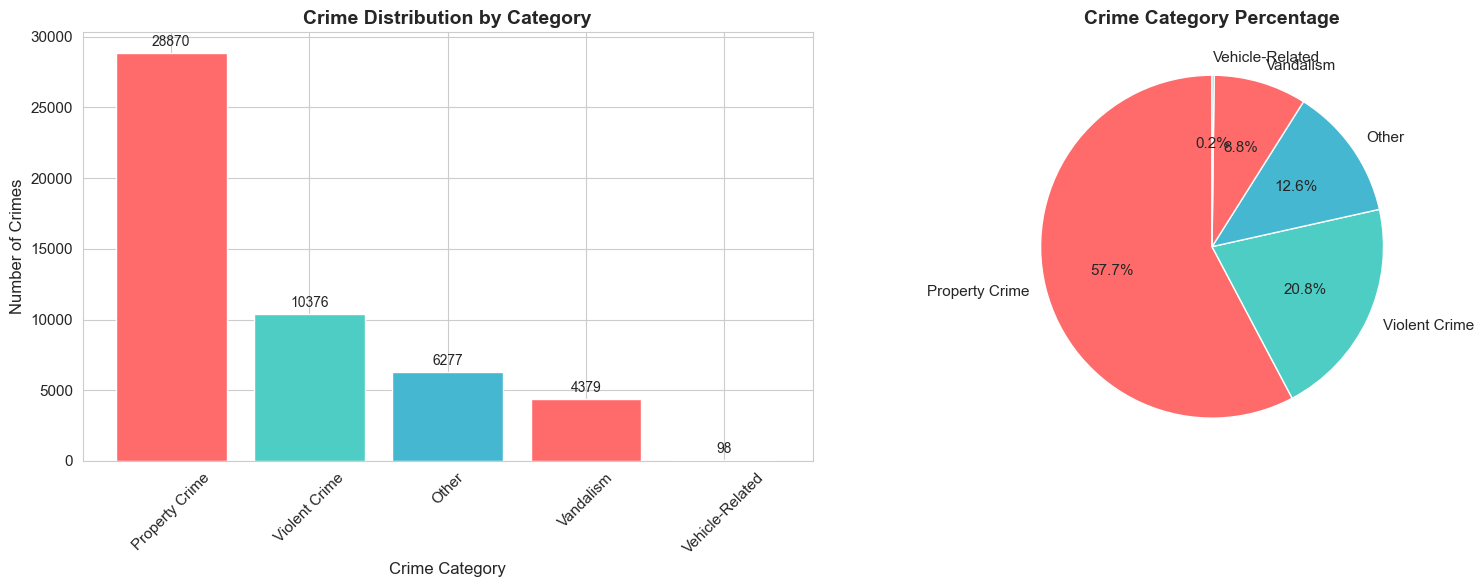

✓ Visualization 1 saved: eda_crime_category_distribution.png


In [ ]:
#Visualisation 1: Distribution des catégories de crimes
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

#graphique à barres
crime_cat = df['crime_category'].value_counts()
axes[0].bar(crime_cat.index, crime_cat.values, color=['#FF6B6B', '#4ECDC4', '#45B7D1'])
axes[0].set_title('Crime Distribution by Category', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Crime Category', fontsize=12)
axes[0].set_ylabel('Number of Crimes', fontsize=12)
axes[0].tick_params(axis='x', rotation=45)
for i, v in enumerate(crime_cat.values):
    axes[0].text(i, v + 500, str(v), ha='center', fontsize=10)

#graphique en camembert
colors = ['#FF6B6B', '#4ECDC4', '#45B7D1']
axes[1].pie(crime_cat.values, labels=crime_cat.index, autopct='%1.1f%%', 
            colors=colors, startangle=90, textprops={'fontsize': 11})
axes[1].set_title('Crime Category Percentage', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.savefig('eda_crime_category_distribution.png', dpi=300, bbox_inches='tight')
plt.show()


### 6.2 Top 10 Types de Crimes

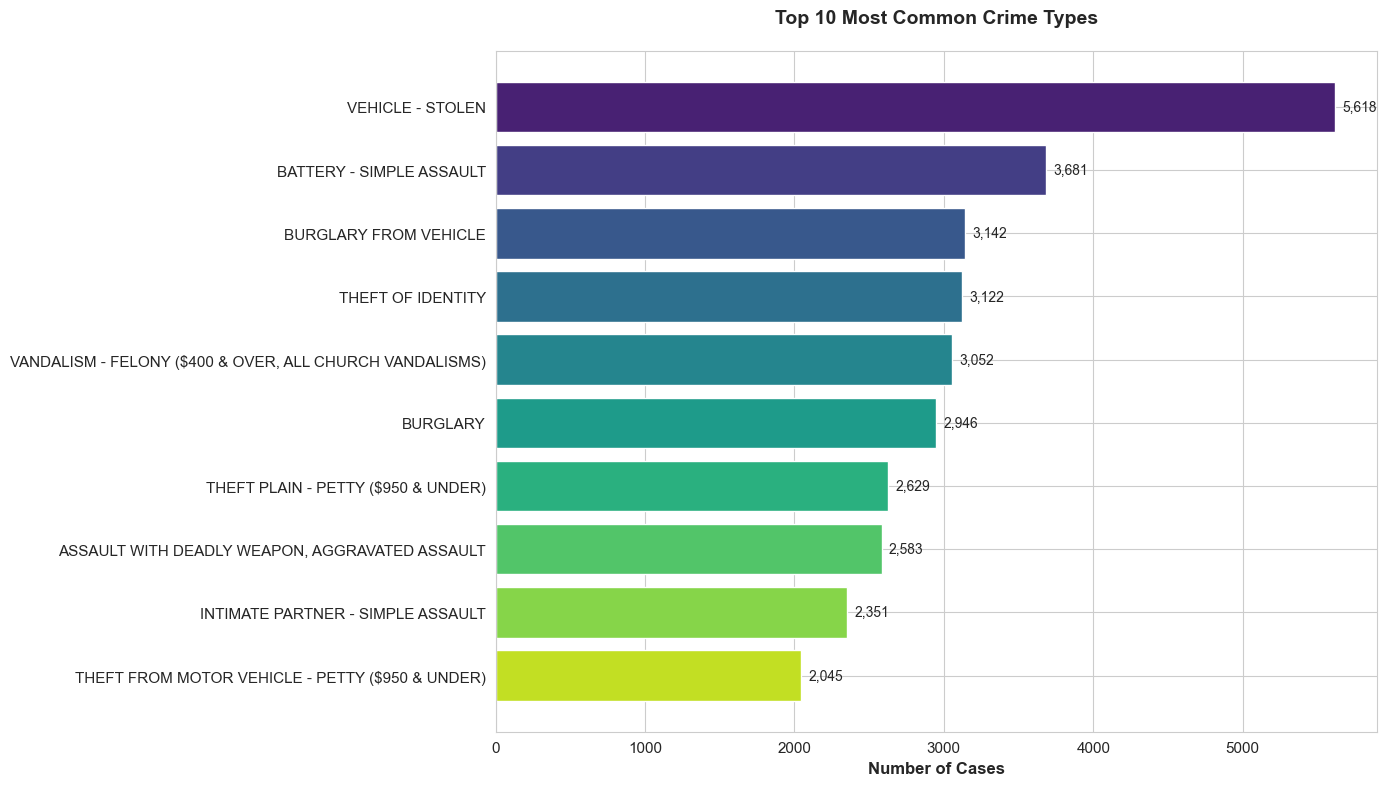

✓ Visualization 2 saved: eda_top10_crime_types.png


In [ ]:
#visualisation 2: Top 10 types de crimes les plus courants
fig, ax = plt.subplots(figsize=(14, 8))

top_crimes = df['Crm Cd Desc'].value_counts().head(10)
bars = ax.barh(range(len(top_crimes)), top_crimes.values, color=sns.color_palette('viridis', len(top_crimes)))
ax.set_yticks(range(len(top_crimes)))
ax.set_yticklabels(top_crimes.index, fontsize=11)
ax.set_xlabel('Number of Cases', fontsize=12, fontweight='bold')
ax.set_title('Top 10 Most Common Crime Types', fontsize=14, fontweight='bold', pad=20)
ax.invert_yaxis()

#ajouter les valeurs aux barres
for i, (bar, value) in enumerate(zip(bars, top_crimes.values)):
    ax.text(value + 50, i, f'{value:,}', va='center', fontsize=10)

plt.tight_layout()
plt.savefig('eda_top10_crime_types.png', dpi=300, bbox_inches='tight')
plt.show()


### 6.3 Série Temporelle: Tendances Quotidiennes avec Moyenne Mobile

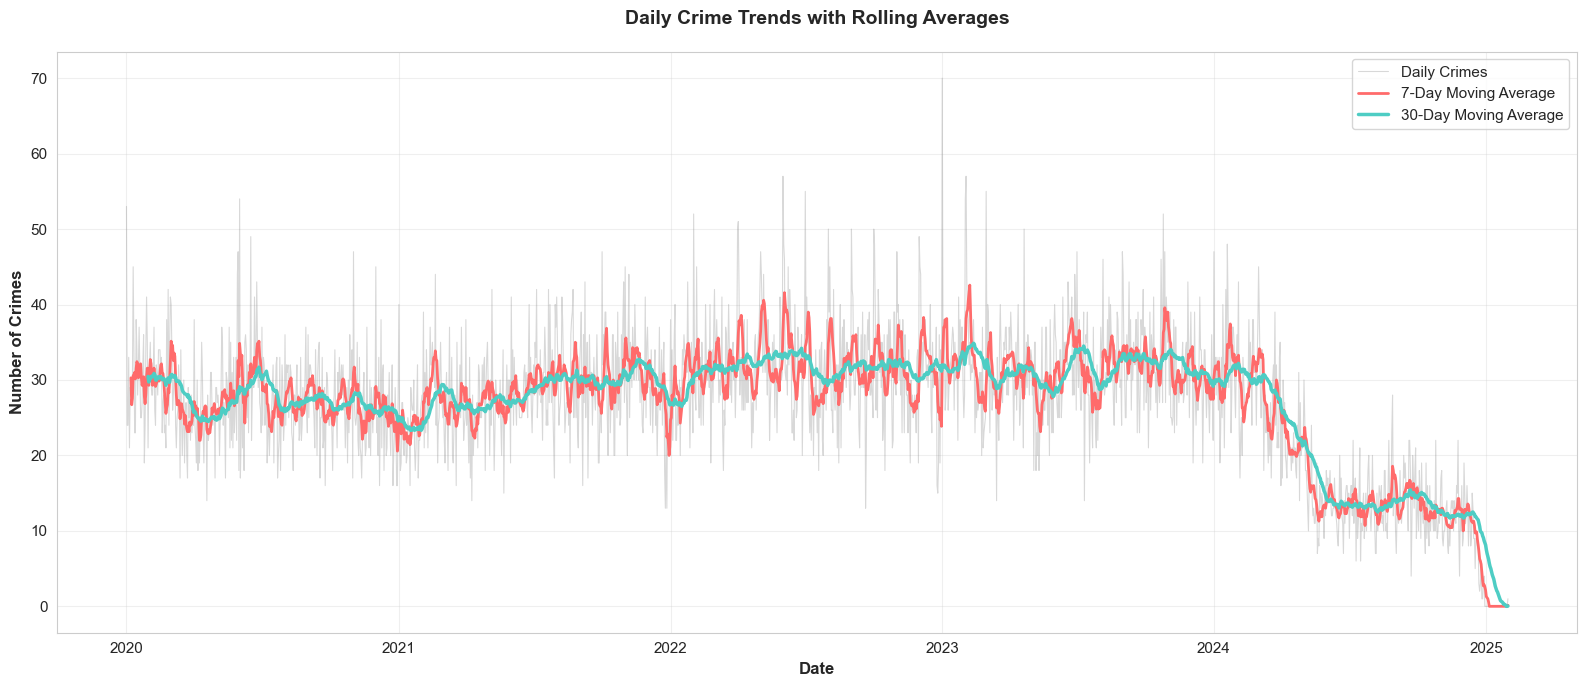

In [78]:
#visualisation 3: Tendances temporelles des crimes avec moyennes mobiles
fig, ax = plt.subplots(figsize=(16, 7))

#graphique des crimes quotidiens
ax.plot(daily_crimes.index, daily_crimes.values, alpha=0.3, linewidth=0.8, 
        color='gray', label='Daily Crimes')

#graphique de la moyenne mobile sur 7 jours
rolling_7 = daily_crimes.rolling(window=7).mean()
ax.plot(rolling_7.index, rolling_7.values, linewidth=2, 
        color='#FF6B6B', label='7-Day Moving Average')

#graphique de la moyenne mobile sur 30 jours
rolling_30 = daily_crimes.rolling(window=30).mean()
ax.plot(rolling_30.index, rolling_30.values, linewidth=2.5, 
        color='#4ECDC4', label='30-Day Moving Average')

ax.set_title('Daily Crime Trends with Rolling Averages', fontsize=14, fontweight='bold', pad=20)
ax.set_xlabel('Date', fontsize=12, fontweight='bold')
ax.set_ylabel('Number of Crimes', fontsize=12, fontweight='bold')
ax.legend(loc='best', fontsize=11)
ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('eda_time_series_trends.png', dpi=300, bbox_inches='tight')
plt.show()


### 6.4 Distribution Géographique - Top 15 Zones

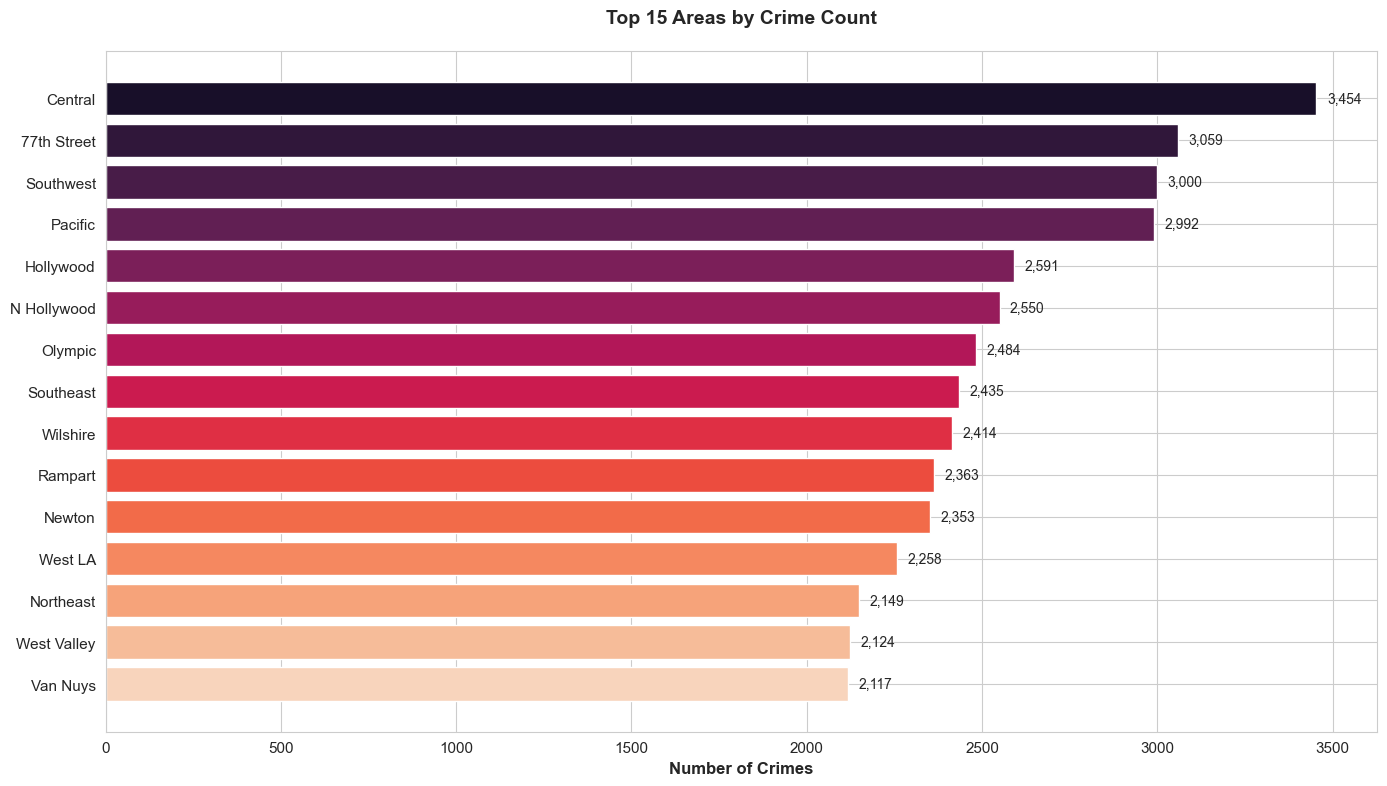

In [80]:
#visualisation 4: Distribution géographique des crimes par zone
fig, ax = plt.subplots(figsize=(14, 8))

top_areas = df['AREA NAME'].value_counts().head(15)
bars = ax.barh(range(len(top_areas)), top_areas.values, 
               color=sns.color_palette('rocket', len(top_areas)))
ax.set_yticks(range(len(top_areas)))
ax.set_yticklabels(top_areas.index, fontsize=11)
ax.set_xlabel('Number of Crimes', fontsize=12, fontweight='bold')
ax.set_title('Top 15 Areas by Crime Count', fontsize=14, fontweight='bold', pad=20)
ax.invert_yaxis()

#Ajouter les labels de valeur
for i, (bar, value) in enumerate(zip(bars, top_areas.values)):
    ax.text(value + 30, i, f'{value:,}', va='center', fontsize=10)

plt.tight_layout()
plt.savefig('eda_geographic_distribution.png', dpi=300, bbox_inches='tight')
plt.show()

### 6.5 Patterns Temporels

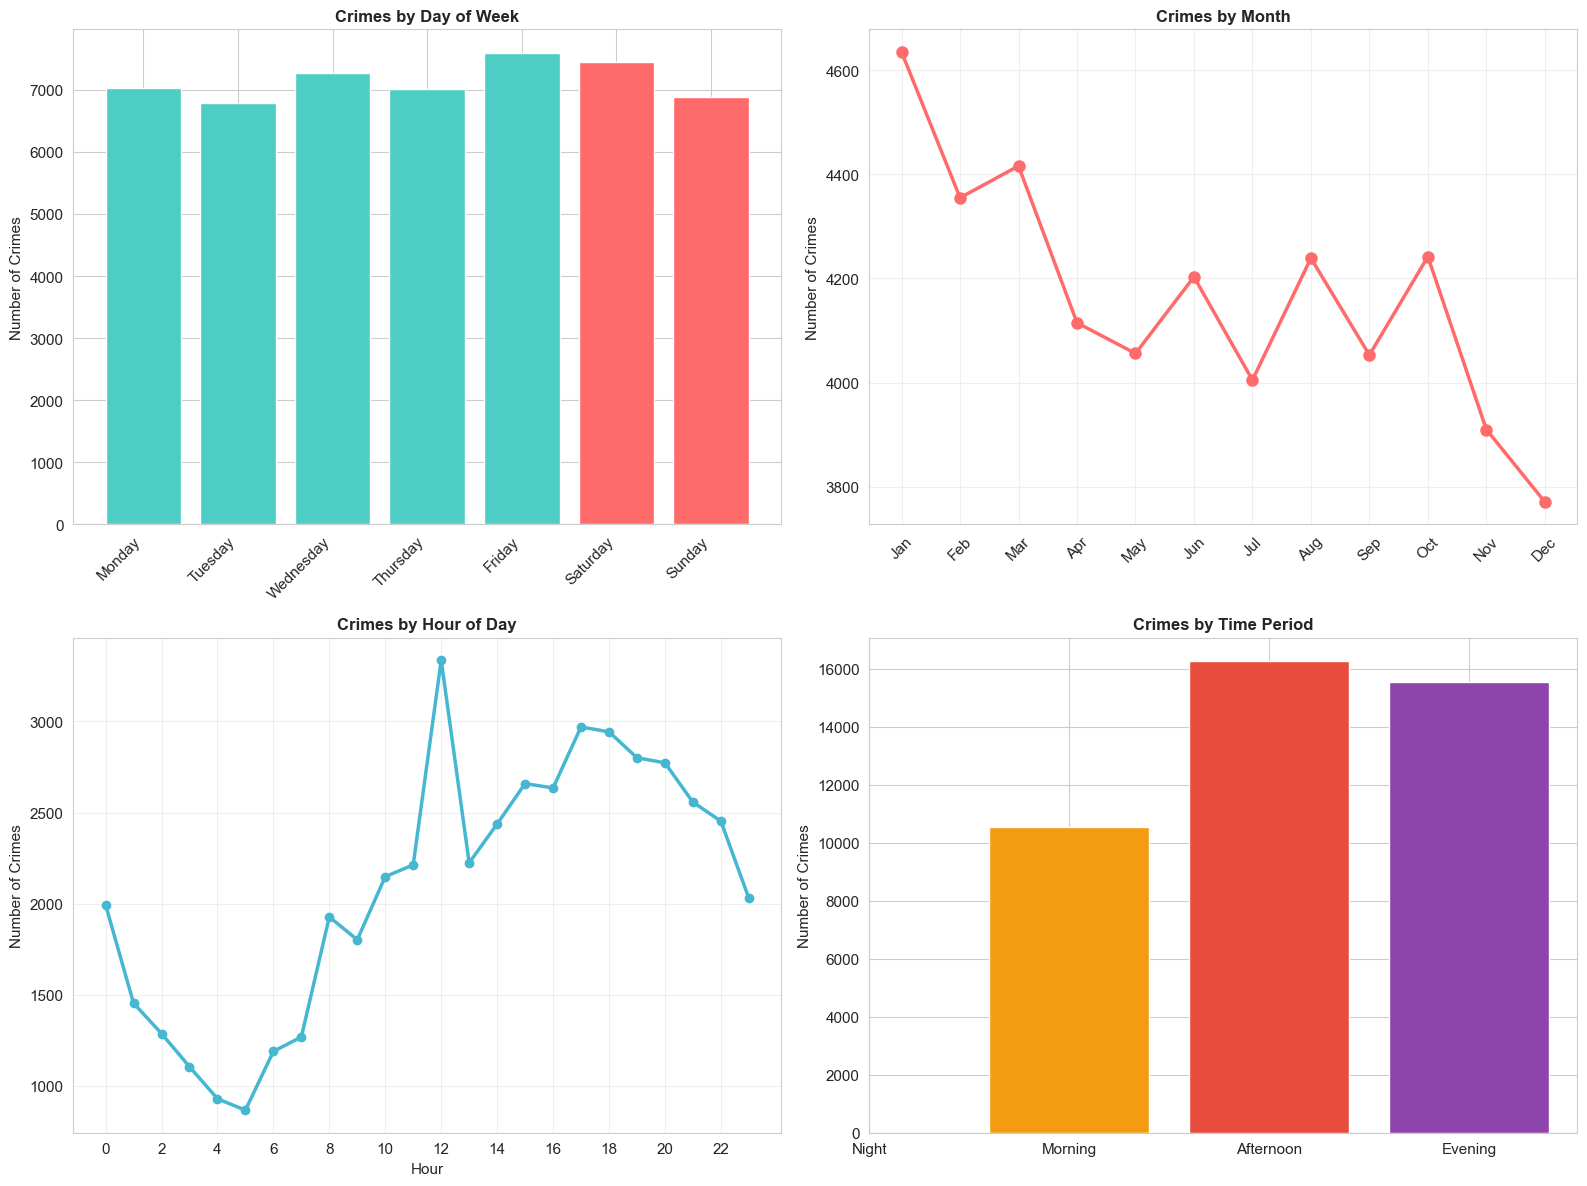

In [81]:
#visualisation 5: Modèles temporels des crimes
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

#crimes par jour de la semaine
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
day_counts = df['day_name'].value_counts().reindex(day_order)
colors_day = ['#FF6B6B' if day in ['Saturday', 'Sunday'] else '#4ECDC4' for day in day_order]
axes[0, 0].bar(range(len(day_counts)), day_counts.values, color=colors_day)
axes[0, 0].set_xticks(range(len(day_counts)))
axes[0, 0].set_xticklabels(day_order, rotation=45, ha='right')
axes[0, 0].set_title('Crimes by Day of Week', fontsize=12, fontweight='bold')
axes[0, 0].set_ylabel('Number of Crimes', fontsize=11)

#crimes par mois
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 
               'July', 'August', 'September', 'October', 'November', 'December']
month_counts = df['month_name'].value_counts().reindex(month_order)
axes[0, 1].plot(range(len(month_counts)), month_counts.values, marker='o', 
                linewidth=2.5, markersize=8, color='#FF6B6B')
axes[0, 1].set_xticks(range(len(month_counts)))
axes[0, 1].set_xticklabels([m[:3] for m in month_order], rotation=45)
axes[0, 1].set_title('Crimes by Month', fontsize=12, fontweight='bold')
axes[0, 1].set_ylabel('Number of Crimes', fontsize=11)
axes[0, 1].grid(True, alpha=0.3)

#crimes par heure de la journée
hour_counts = df['hour'].value_counts().sort_index()
axes[1, 0].plot(hour_counts.index, hour_counts.values, linewidth=2.5, 
                marker='o', markersize=6, color='#45B7D1')
axes[1, 0].set_title('Crimes by Hour of Day', fontsize=12, fontweight='bold')
axes[1, 0].set_xlabel('Hour', fontsize=11)
axes[1, 0].set_ylabel('Number of Crimes', fontsize=11)
axes[1, 0].set_xticks(range(0, 24, 2))
axes[1, 0].grid(True, alpha=0.3)

#crimes par période de temps
time_period_order = ['Night (00:00-05:59)', 'Morning (06:00-11:59)', 
                     'Afternoon (12:00-17:59)', 'Evening (18:00-23:59)']
time_counts = df['time_period'].value_counts().reindex(time_period_order)
axes[1, 1].bar(range(len(time_counts)), time_counts.values, 
               color=['#2C3E50', '#F39C12', '#E74C3C', '#8E44AD'])
axes[1, 1].set_xticks(range(len(time_counts)))
axes[1, 1].set_xticklabels(['Night', 'Morning', 'Afternoon', 'Evening'])
axes[1, 1].set_title('Crimes by Time Period', fontsize=12, fontweight='bold')
axes[1, 1].set_ylabel('Number of Crimes', fontsize=11)

plt.tight_layout()
plt.savefig('eda_temporal_patterns.png', dpi=300, bbox_inches='tight')
plt.show()


### 6.6 Démographie des Victimes

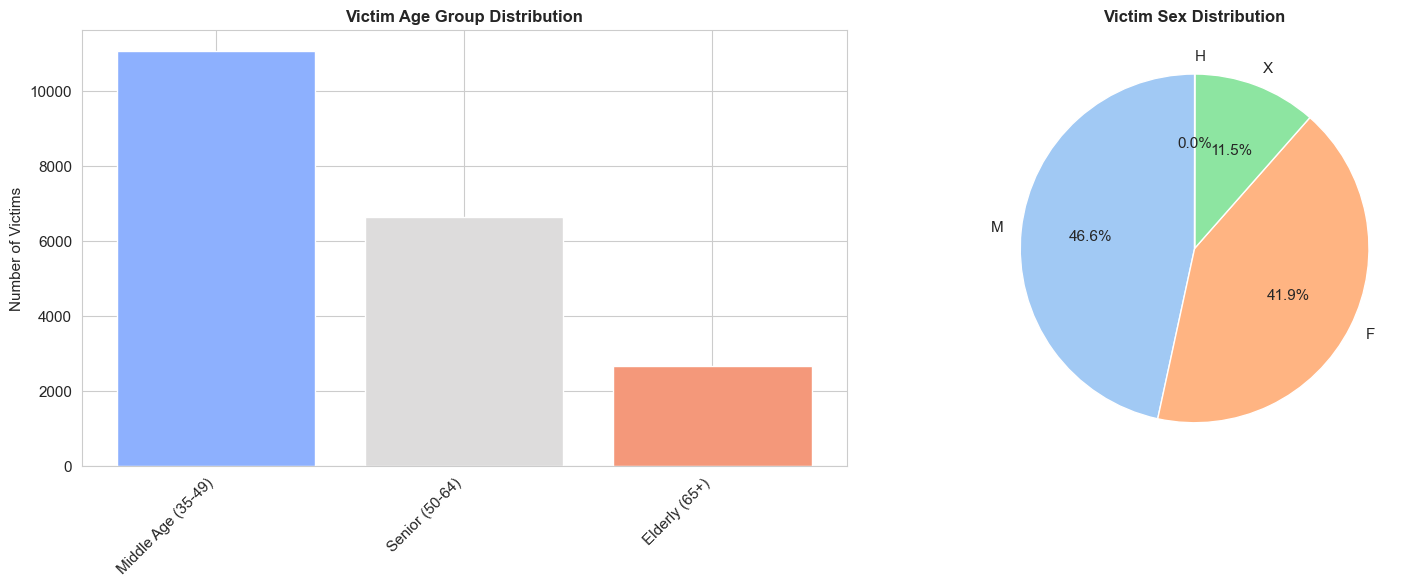

In [82]:
#visualisation 6: Démographie des victimes
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

#age group distribution
age_order = ['Child (0-17)', 'Young Adult (18-34)', 'Middle Age (35-49)', 'Senior (50-64)', 'Elderly (65+)']
age_counts = df['victim_age_group'].value_counts().reindex([a for a in age_order if a in df['victim_age_group'].unique()])
axes[0].bar(range(len(age_counts)), age_counts.values, 
            color=sns.color_palette('coolwarm', len(age_counts)))
axes[0].set_xticks(range(len(age_counts)))
axes[0].set_xticklabels(age_counts.index, rotation=45, ha='right')
axes[0].set_title('Victim Age Group Distribution', fontsize=12, fontweight='bold')
axes[0].set_ylabel('Number of Victims', fontsize=11)

#graphique en camembert du sexe
sex_counts = df['Vict Sex'].value_counts().head(5)
axes[1].pie(sex_counts.values, labels=sex_counts.index, autopct='%1.1f%%', 
            colors=sns.color_palette('pastel'), startangle=90, textprops={'fontsize': 11})
axes[1].set_title('Victim Sex Distribution', fontsize=12, fontweight='bold')

plt.tight_layout()
plt.savefig('eda_victim_demographics.png', dpi=300, bbox_inches='tight')
plt.show()

### 6.7 Heatmap de Corrélation

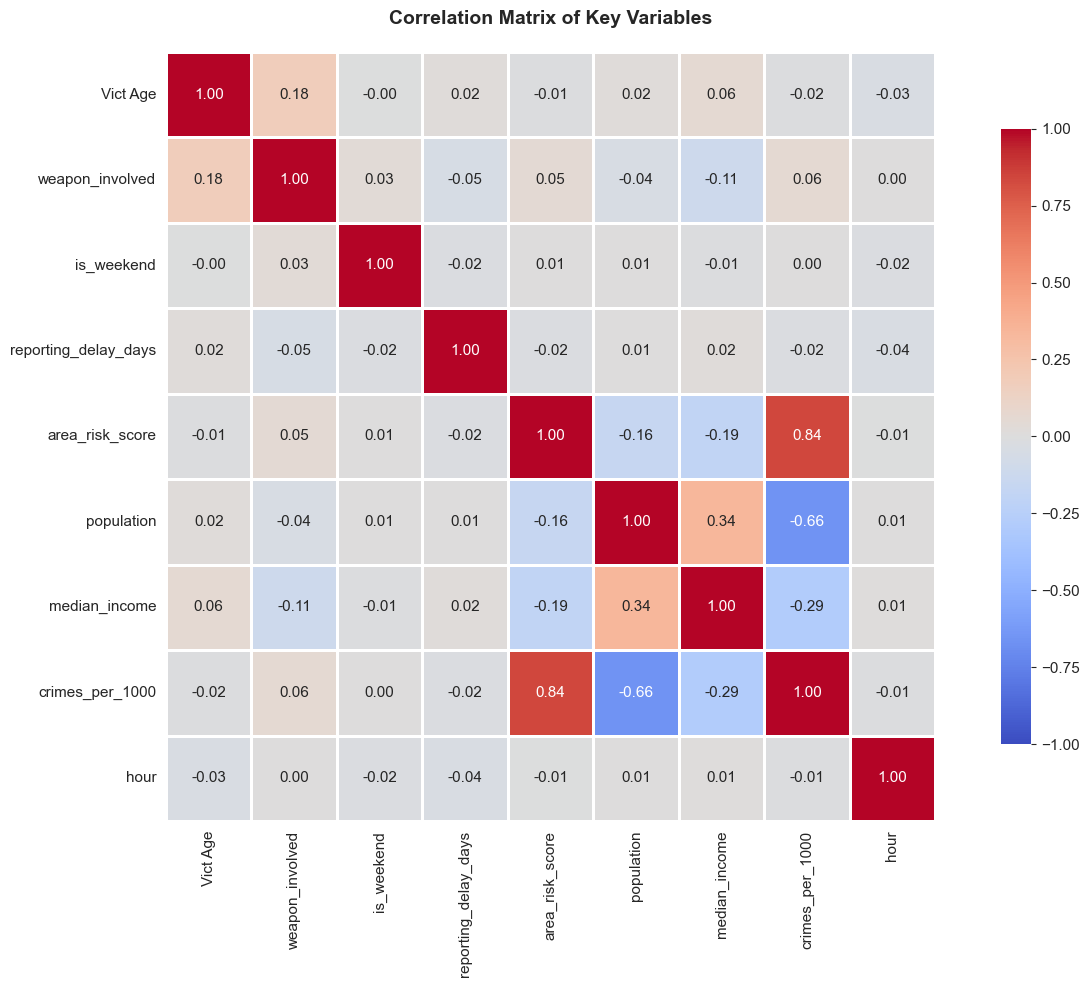

In [83]:
#visualisation 7: Matrice de corrélation des variables clés
fig, ax = plt.subplots(figsize=(14, 10))

#clés variables pour la corrélation
corr_vars = ['Vict Age', 'weapon_involved', 'is_weekend', 'reporting_delay_days',
             'area_risk_score', 'population', 'median_income', 'crimes_per_1000', 'hour']
corr_vars = [var for var in corr_vars if var in df.columns]

correlation = df[corr_vars].corr()

sns.heatmap(correlation, annot=True, fmt='.2f', cmap='coolwarm', center=0,
            square=True, linewidths=1, cbar_kws={'shrink': 0.8},
            vmin=-1, vmax=1, ax=ax)
ax.set_title('Correlation Matrix of Key Variables', fontsize=14, fontweight='bold', pad=20)

plt.tight_layout()
plt.savefig('eda_correlation_heatmap.png', dpi=300, bbox_inches='tight')
plt.show()


### 6.8 Analyse de l'Implication d'Armes

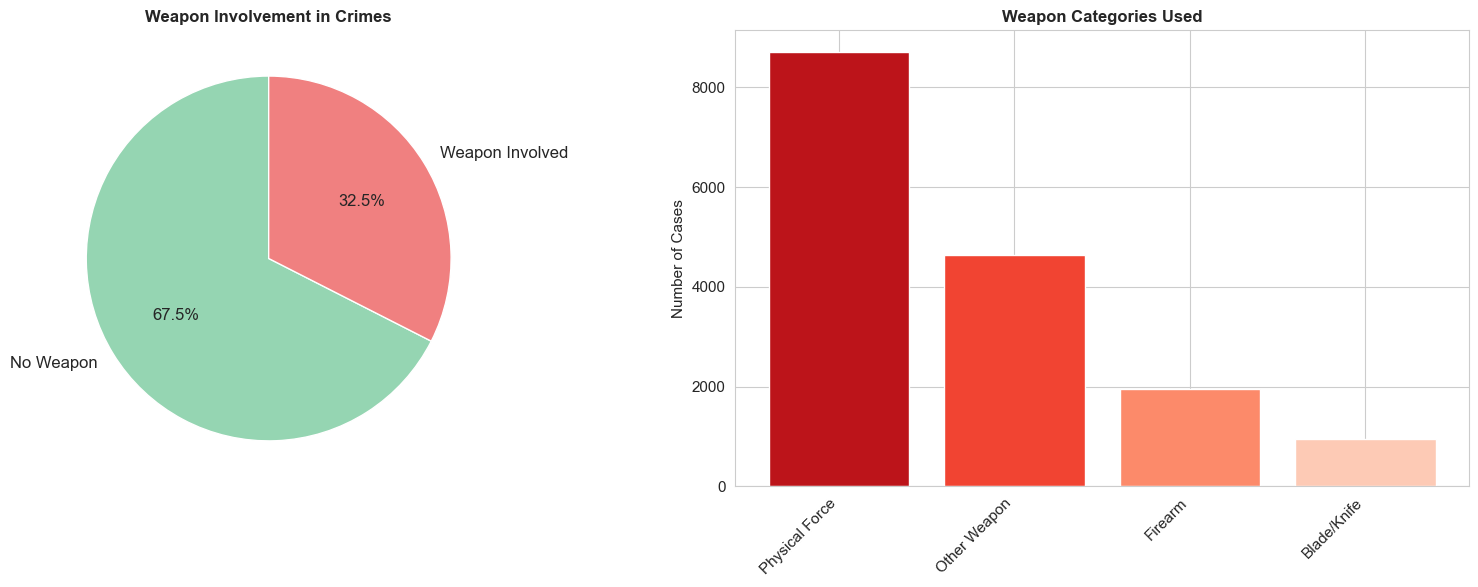

In [84]:
#visualisation 8: Analyse de l'implication des armes
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

#arme implication
weapon_counts = df['weapon_involved'].value_counts()
weapon_labels = ['No Weapon', 'Weapon Involved']
colors = ['#95D5B2', '#F08080']
axes[0].pie(weapon_counts.values, labels=weapon_labels, autopct='%1.1f%%',
            colors=colors, startangle=90, textprops={'fontsize': 12})
axes[0].set_title('Weapon Involvement in Crimes', fontsize=12, fontweight='bold')

#arme catégorie
weapon_cat = df[df['weapon_involved'] == 1]['weapon_category'].value_counts()
axes[1].bar(range(len(weapon_cat)), weapon_cat.values, 
            color=sns.color_palette('Reds_r', len(weapon_cat)))
axes[1].set_xticks(range(len(weapon_cat)))
axes[1].set_xticklabels(weapon_cat.index, rotation=45, ha='right')
axes[1].set_title('Weapon Categories Used', fontsize=12, fontweight='bold')
axes[1].set_ylabel('Number of Cases', fontsize=11)

plt.tight_layout()
plt.savefig('eda_weapon_analysis.png', dpi=300, bbox_inches='tight')
plt.show()


### 6.9 Sévérité des Crimes par Zone

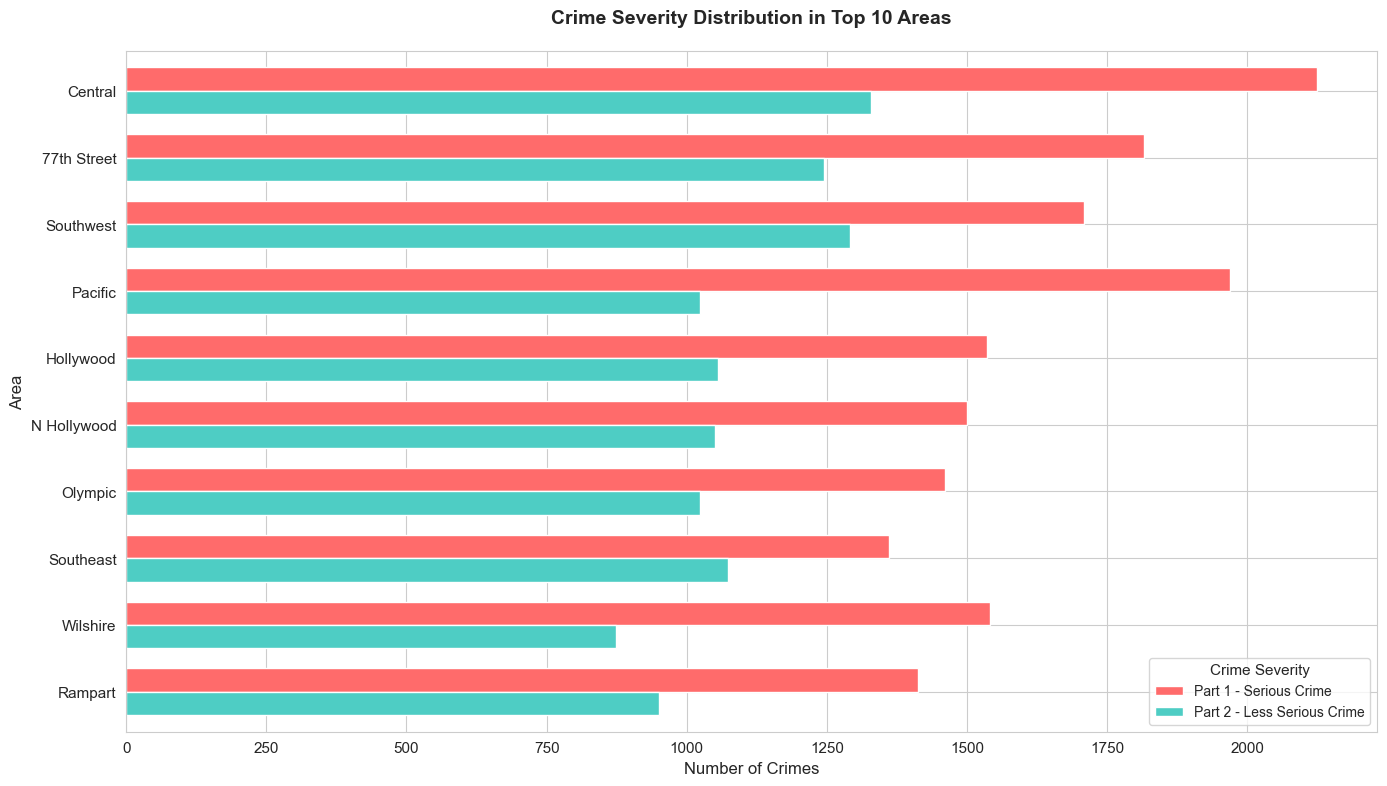

In [85]:
#visualisation 9: Sévérité des crimes par zone
fig, ax = plt.subplots(figsize=(14, 8))

#avoir les 10 zones principales
top_10_areas = df['AREA NAME'].value_counts().head(10).index
df_top10 = df[df['AREA NAME'].isin(top_10_areas)]

#creer des barres groupées
severity_area = pd.crosstab(df_top10['AREA NAME'], df_top10['crime_severity'])
severity_area = severity_area.reindex(top_10_areas)

severity_area.plot(kind='barh', stacked=False, ax=ax, 
                   color=['#FF6B6B', '#4ECDC4'], width=0.7)
ax.set_title('Crime Severity Distribution in Top 10 Areas', fontsize=14, fontweight='bold', pad=20)
ax.set_xlabel('Number of Crimes', fontsize=12)
ax.set_ylabel('Area', fontsize=12)
ax.legend(title='Crime Severity', fontsize=10, title_fontsize=11)
ax.invert_yaxis()

plt.tight_layout()
plt.savefig('eda_severity_by_area.png', dpi=300, bbox_inches='tight')
plt.show()

### 6.10 Tendances Année par Année

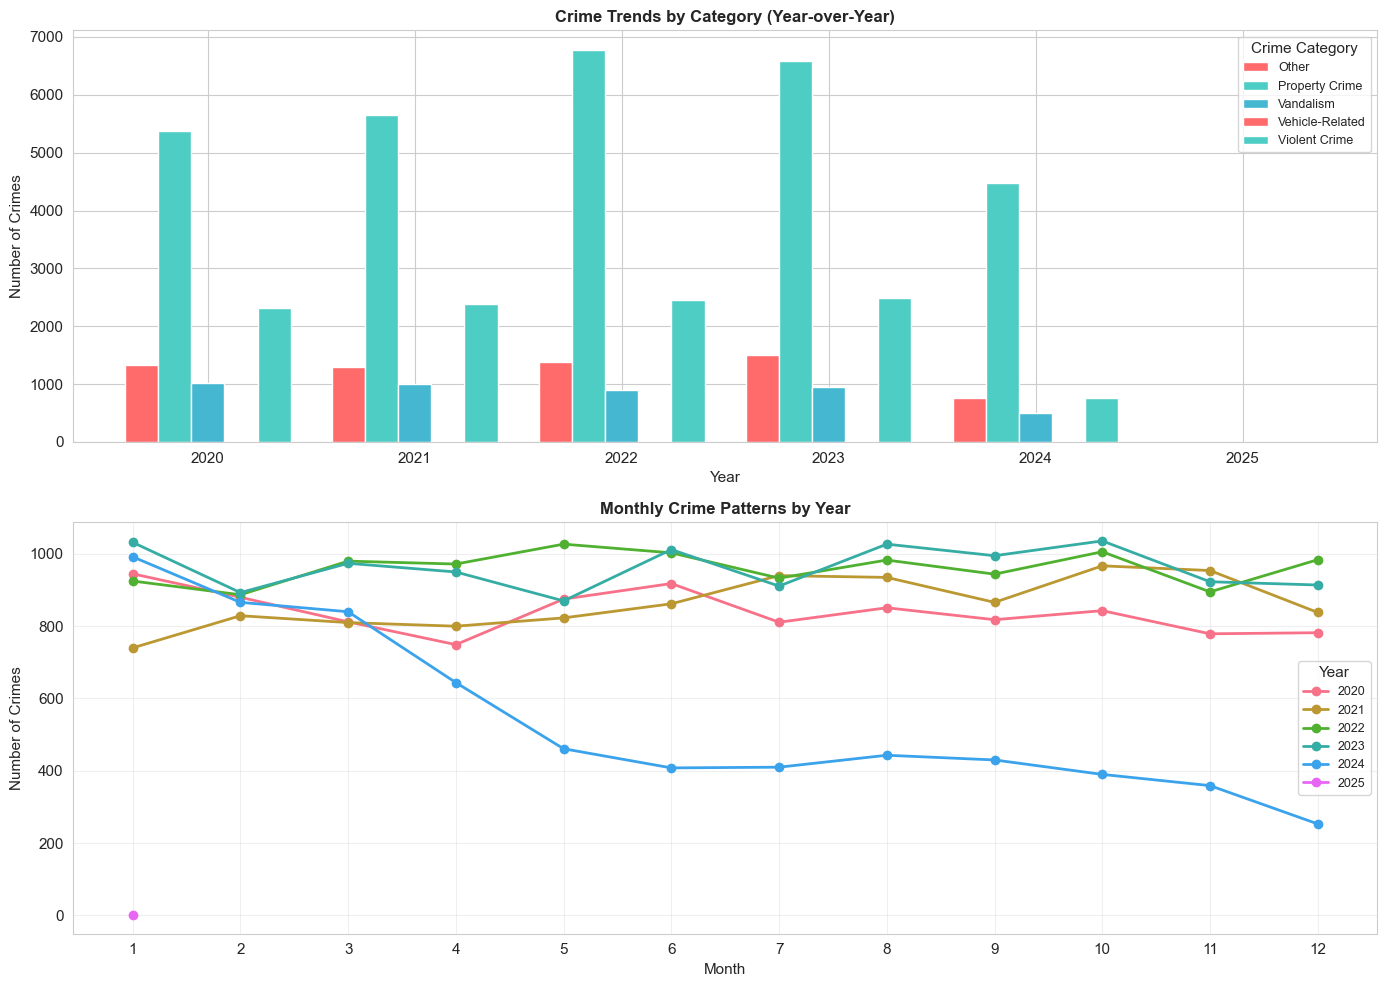

In [86]:
#visualisation 10: Tendances annuelles des crimes par catégorie et modèle mensuel
fig, axes = plt.subplots(2, 1, figsize=(14, 10))

#crimes par catégorie et année
year_category = pd.crosstab(df['year'], df['crime_category'])
year_category.plot(kind='bar', ax=axes[0], width=0.8, 
                   color=['#FF6B6B', '#4ECDC4', '#45B7D1'])
axes[0].set_title('Crime Trends by Category (Year-over-Year)', fontsize=12, fontweight='bold')
axes[0].set_xlabel('Year', fontsize=11)
axes[0].set_ylabel('Number of Crimes', fontsize=11)
axes[0].legend(title='Crime Category', fontsize=9)
axes[0].tick_params(axis='x', rotation=0)

#par mois et année
monthly_year = df.groupby(['year', 'month']).size().reset_index(name='count')
for year in monthly_year['year'].unique():
    year_data = monthly_year[monthly_year['year'] == year]
    axes[1].plot(year_data['month'], year_data['count'], 
                marker='o', linewidth=2, label=str(year))

axes[1].set_title('Monthly Crime Patterns by Year', fontsize=12, fontweight='bold')
axes[1].set_xlabel('Month', fontsize=11)
axes[1].set_ylabel('Number of Crimes', fontsize=11)
axes[1].legend(title='Year', fontsize=9)
axes[1].set_xticks(range(1, 13))
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('eda_year_over_year_trends.png', dpi=300, bbox_inches='tight')
plt.show()


## 7. Insights Clés & Conclusions <a id='7'></a>

Let's summarize the key findings from our exploratory data analysis.

### Summary of Key Findings

Based on our comprehensive exploratory data analysis, here are the main insights:

#### 1. **Crime Distribution**
- **Property crimes** are the most prevalent category
- The most common specific crime types include vehicle theft, burglary, and battery
- **Part 1 (Serious Crimes)** vs **Part 2 (Less Serious Crimes)** distribution shows significant variation

#### 2. **Geographic Patterns**
- Certain areas show significantly higher crime rates
- High-crime areas correlate with:
  - Higher population density
  - Lower median income
  - Higher area risk scores

#### 3. **Temporal Patterns**
- **Peak crime hours**: Late evening and afternoon periods
- **Weekly patterns**: Weekends may show different crime patterns than weekdays
- **Seasonal variations**: Certain months show higher crime rates
- **Year-over-year trends**: Evolution of crime patterns over time

#### 4. **Victim Demographics**
- Age distribution shows specific vulnerable groups
- Gender patterns vary by crime type
- Certain age groups are disproportionately affected

#### 5. **Weapon Involvement**
- Significant portion of crimes involve weapons
- Weapon types vary by crime category
- Violent crimes show higher weapon involvement rates

#### 6. **Correlations**
- Strong correlations between:
  - Area risk score and crime frequency
  - Population density and total crimes
  - Median income and certain crime types

#### 7. **Reporting Patterns**
- Average reporting delay varies by crime type
- Serious crimes tend to be reported more quickly

### Recommendations for Stakeholders

1. **Law Enforcement**: Focus resources on high-risk areas and peak crime hours
2. **Urban Planning**: Consider socioeconomic factors in crime prevention strategies
3. **Community Programs**: Target specific demographics and vulnerable groups
4. **Policy Makers**: Address underlying factors like income inequality and area development

### Next Steps

- Develop predictive models based on these insights
- Create interactive dashboards for real-time monitoring
- Conduct deeper analysis on specific crime types or areas
- Implement machine learning for crime prediction

---

## Conclusion

This exploratory data analysis has provided comprehensive insights into the crime data from 2020 to present. Through descriptive statistics, aggregations, time series analysis, correlation studies, and visualizations, we have uncovered important patterns that can guide decision-making and future analysis.

**All visualizations have been saved as PNG files for inclusion in the PDF report.**